<a href="https://colab.research.google.com/github/SrijanSahaySrivastava/OIBSIP/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


*Cleaning Dataset*

In [ ]:
df.drop(columns=['fuelsystem', 'aspiration', 'symboling'], inplace =True)

In [ ]:
df.drop(columns=['car_ID','compressionratio', 'curbweight', 'enginelocation', 'carwidth', 'carheight'], inplace = True)

In [ ]:
df.drop(columns = ['enginetype'], inplace = True)

In [ ]:
df.shape

(205, 16)

In [ ]:
df.head()

,CarName,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,cylindernumber,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,two,convertible,rwd,88.6,168.8,four,130,3.47,2.68,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,two,convertible,rwd,88.6,168.8,four,130,3.47,2.68,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,94.5,171.2,six,152,2.68,3.47,154,5000,19,26,16500.0
3,audi 100 ls,gas,four,sedan,fwd,99.8,176.6,four,109,3.19,3.40,102,5500,24,30,13950.0
4,audi 100ls,gas,four,sedan,4wd,99.4,176.6,five,136,3.19,3.40,115,5500,18,22,17450.0


In [ ]:
df

,CarName,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,cylindernumber,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,two,convertible,rwd,88.6,168.8,four,130,3.47,2.68,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,two,convertible,rwd,88.6,168.8,four,130,3.47,2.68,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,94.5,171.2,six,152,2.68,3.47,154,5000,19,26,16500.0
3,audi 100 ls,gas,four,sedan,fwd,99.8,176.6,four,109,3.19,3.40,102,5500,24,30,13950.0
4,audi 100ls,gas,four,sedan,4wd,99.4,176.6,five,136,3.19,3.40,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,four,sedan,rwd,109.1,188.8,four,141,3.78,3.15,114,5400,23,28,16845.0
201,volvo 144ea,gas,four,sedan,rwd,109.1,188.8,four,141,3.78,3.15,160,5300,19,25,19045.0
202,volvo 244dl,gas,four,sedan,rwd,109.1,188.8,six,173,3.58,2.87,134,5500,18,23,21485.0
203,volvo 246,diesel,four,sedan,rwd,109.1,188.8,six,145,3.01,3.40,106,4800,26,27,22470.0


In [ ]:
print(df.fueltype.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.cylindernumber.value_counts())

0    185
1     20
Name: fueltype, dtype: int64
4    115
2     90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [ ]:
df.replace({'fueltype':{'gas':0, 'diesel':1}}, inplace = True)

In [ ]:
df.replace({'doornumber':{'two':2, 'four':4}}, inplace = True)
df.replace({'carbody':{'sedan':0, 'hatchback':1, 'wagon' : 2, 'hardtop':3, 'convertible':4}}, inplace = True)
df.replace({'drivewheel':{'fwd':0, 'rwd':1, '4wd':2}}, inplace = True)
df.replace({'cylindernumber':{'four':0, 'six':1, 'five':2, 'eight':3, 'two':4, 'three':5, 'twelve':6}}, inplace = True)

In [ ]:
df.head()

,CarName,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,cylindernumber,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,0,2,4,1,88.6,168.8,0,130,3.47,2.68,111,5000,21,27,13495.0
1,alfa-romero stelvio,0,2,4,1,88.6,168.8,0,130,3.47,2.68,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,0,2,1,1,94.5,171.2,1,152,2.68,3.47,154,5000,19,26,16500.0
3,audi 100 ls,0,4,0,0,99.8,176.6,0,109,3.19,3.40,102,5500,24,30,13950.0
4,audi 100ls,0,4,0,2,99.4,176.6,2,136,3.19,3.40,115,5500,18,22,17450.0


**Splitting and Training with DATA**




In [ ]:
x = df.drop(['price', 'CarName'], axis=1)
y = df['price']

In [ ]:
x.head()

,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,cylindernumber,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
0,0,2,4,1,88.6,168.8,0,130,3.47,2.68,111,5000,21,27
1,0,2,4,1,88.6,168.8,0,130,3.47,2.68,111,5000,21,27
2,0,2,1,1,94.5,171.2,1,152,2.68,3.47,154,5000,19,26
3,0,4,0,0,99.8,176.6,0,109,3.19,3.40,102,5500,24,30
4,0,4,0,2,99.4,176.6,2,136,3.19,3.40,115,5500,18,22


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.10, random_state=2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_data = model.predict(x_train)

In [ ]:
error = metrics.r2_score(y_train, train_data) #r^2 error
print("R^2 error =" ,error)

R^2 error = 0.8591485334173853


**Visualizing Accuracy**

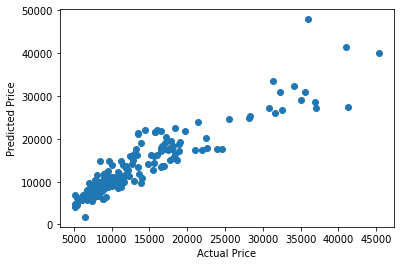

In [ ]:
plt.scatter(y_train, train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
test_data = model.predict(x_test)
error = metrics.r2_score(y_test, test_data) #r^2 error
print("R^2 error =" ,error)

R^2 error = 0.8652515908260443


In [ ]:
print("accuracy :- ", model.score(x_test, y_test)*100, "%")

accuracy :-  86.52515908260443 %
